## Build a classification model using telecom dataset

In [72]:
import pandas as pd
import numpy as np

In [73]:
churn_df = pd.read_csv('data/telecom_churn_clean.csv', index_col=0)

In [4]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
# import KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
x = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifiers to the data
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

In [6]:
# New data points
x_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [7]:
# Predict the labels for the x_new
y_pred = knn.predict(x_new)

# Print the predictions for x_new
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


Great work! The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? Let's explore how to measure a model's performance
### Measuring model performance

Train/test split + computing accuracy

In [8]:
# import module
from sklearn.model_selection import train_test_split

x = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Spltting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Print the accuracy
print(knn.score(x_test, y_test))

0.8740629685157422


Overfitting and underfitting

Our aim is to produce a model that can interprete the relationship between features and the target variable, as well as generalized well when exposed to new observations.

In [9]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


Visualizing model complexity

Creating a model complexity curve to visualize how performance changes as the model becomes less complex.

In [10]:
import matplotlib.pyplot as plt

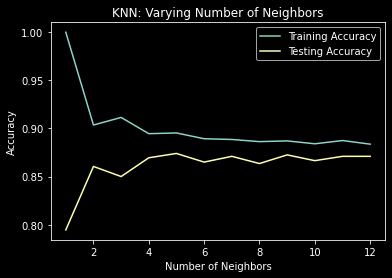

In [11]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display plot
plt.show()

Great work! See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!

### Fine-Tuning Your Model


In [65]:
# Loading data
diabetes = pd.read_csv('data/diabetes_clean.csv')
diabetes_df = pd.read_csv('data/diabetes_clean.csv').drop(["pregnancies", "glucose", "diastolic", "triceps", "insulin", "dpf"], axis=1)

# Creating array of values
x = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df['diabetes'].values

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



In [66]:
# # Calculate roc_auc_score
# y_pred_probs = knn.predict_proba(x_test)[:, 1]

# print(roc_auc_score(y_test, y_pred_probs))

0.6685844370860927


Excellent! The model produced 116 true positives, 34 true negatives, 35 false negatives, and 46 false positives. The classification report shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

### Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [67]:
# Creating array of values
x = diabetes.drop("diabetes", axis=1).values
y = diabetes['diabetes'].values

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(x_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(x_test)[:, 1]

print(y_pred_probs[:10])

[0.26551033 0.18336517 0.12119579 0.15613576 0.49611313 0.44582247
 0.01359232 0.61646134 0.55640551 0.79311895]


c:\Users\okoro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nicely done! Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

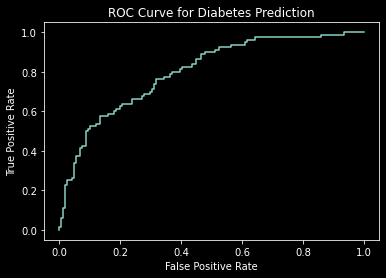

In [68]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

Well done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

In [69]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



In [70]:
knn = KNeighborsClassifier(n_neighbors=6)

# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

# Calculate roc_auc_score
y_pred_probs = knn.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_test, y_pred_probs))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7300496688741722
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

In [74]:
music_df = pd.read_csv('data/music_clean.csv', index_col=0)
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [81]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [89]:
# steps = [("imputer", imp_mean),
#         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[53 44]
 [48 55]]


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [91]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


Well done! Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!

Enter the names of your steps as strings in the first part of each tuple in steps.
Pass a string the model name followed by two underscores, then the hyperparameter name when creating parameters; for example the C parameter would be logreg__C.
Pass pipeline when instantiating GridSearchCV, setting param_grid equal to the parameter space you created.